In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')
df = df[['T5', 'T6', 'GT', 'DT', 'KV', 'KT', 'NGONNGU', 'TOANLOGICPHANTICH', 'GIAIQUYETVANDE', 'NGAYTHI', 'DINHHUONGNGHENGHIEP']]

In [2]:

# Đổi tên cột
df.rename(columns={'TOANLOGICPHANTICH': 'LOGIC', 'GIAIQUYETVANDE': 'UNGXU', 'DINHHUONGNGHENGHIEP': 'HUONGNGHIEP'}, inplace=True)

In [3]:
df.head(5)

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP
0,7.4,6.9,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,3.0,4.0,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,4.8,5.7,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,6.1,7.4,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,6.8,8.0,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No


In [4]:
# Xóa bỏ các dòng dữ liệu rỗng
df.dropna(how='all', inplace=True)

In [5]:
# Xóa bỏ các dòng dữ liệu bị trùng
df.drop_duplicates(inplace=True)

In [6]:
# import thư viện matplotlib
import matplotlib.pyplot as plt

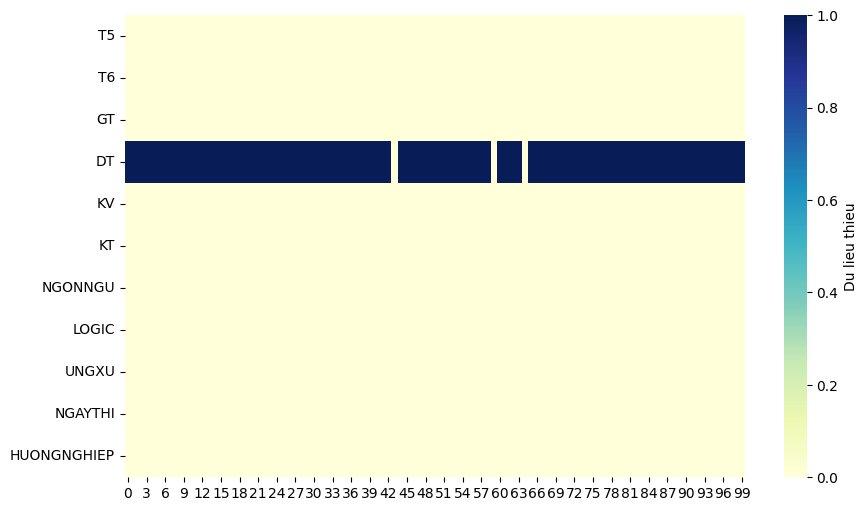

In [7]:
# Dùng heatmap để trực quan hóa dữ liệu
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(), cmap='YlGnBu', cbar_kws={'label': 'Du lieu thieu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

In [8]:
df

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP
0,7.4,6.9,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,3.0,4.0,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,4.8,5.7,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,6.1,7.4,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,6.8,8.0,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,NaN,1,C,5.25,1.50,6.25,7/20/2022,Yes
96,5.5,5.7,F,NaN,1,C,5.25,3.75,4.75,7/20/2022,No
97,9.0,8.5,M,NaN,2NT,C,7.00,8.00,4.00,7/20/2022,Yes
98,4.1,4.3,M,NaN,1,C,5.00,3.50,5.50,7/20/2022,No


In [9]:
# Điền giá trị thiếu
df['DT'].fillna('KINH', inplace=True)
# Lưu ý: với biến định tính ta có thể thay bằng giá trị yếu vị (mode)
# df['DT'].fillna(df['DT'].mode()[0], inplace=True)
# Điền giá trị còn thiếu phần NGONNGU bằng 0 (nếu có)
df['NGONNGU'].fillna(0, inplace=True)
# Điền giá trị còn thiếu phần LOGIC bằng trung bình nếu có (nếu có)
df['LOGIC'].fillna(df['LOGIC'].mean(), inplace=True)
# Điền giá trị còn thiếu phần UNGXU bằng trung vị nếu có (nếu có)
df['UNGXU'].fillna(df['UNGXU'].median(), inplace=True)
# Lưu ý với biến định lượng thì ta nên thay bằng trung vị

In [10]:
'''
Phần 2: Kỹ thuật Feature Engineering
(Thường dùng cho Machine Learning)
Nếu chỉ là xử lý phân tích dữ liệu thì ta gọi là New Attribute

Đây là kỹ thuật tạo thêm hoặc biến đổi số liệu sẵn có thành các biến số mưới phù
hợp cho nghiệp vụ nghiên cứu để phân tích

Tạo biến TBTOAN: Trung bình lớp 12
'''
# df
df['TBTOAN'] = (df['T5'] + df['T6'])/2
df

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP,TBTOAN
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,7.15
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,3.50
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.25
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,6.75
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,7.40
...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,7.25
96,5.5,5.7,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,5.60
97,9.0,8.5,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,8.75
98,4.1,4.3,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.20


In [11]:
# Tạo biến XEPLOAI: Đánh giá toán dựa trên df['TBTOAN']
df.loc[df['TBTOAN'] < 5.0, 'XEPLOAI'] = 'FAIL'

df.loc[(df['TBTOAN'] >= 5.0) & 
(df['TBTOAN'] < 7.0), 'XEPLOAI']= 'FAIR'

df.loc[(df['TBTOAN'] >= 7.0) & 
(df['TBTOAN'] < 9.0), 'XEPLOAI']= 'GOOD'

df.loc[df['TBTOAN'] >= 9.0, 'XEPLOAI'] = 'EXCEL'

df[['TBTOAN', 'XEPLOAI']].head(10)

,TBTOAN,XEPLOAI
0,7.15,GOOD
1,3.50,FAIL
2,5.25,FAIR
3,6.75,FAIR
4,7.40,GOOD
5,8.15,GOOD
6,5.35,FAIR
7,8.40,GOOD
8,7.70,GOOD
9,7.20,GOOD


In [12]:
'''Tao bien nhom khoi thi: NHOMKT thoa man
A1: G1
C: G3
D1: G3
A: G1
B: G2
'''

dict_map = {
    'A1': 'G1' , 'C': 'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}

df['NHOMKT'] = df['KT'].map(dict_map)
df

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP,TBTOAN,XEPLOAI,NHOMKT
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,7.15,GOOD,G1
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,3.50,FAIL,G3
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.25,FAIR,G3
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,6.75,FAIR,G3
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,7.40,GOOD,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,7.25,GOOD,G3
96,5.5,5.7,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,5.60,FAIR,G3
97,9.0,8.5,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,8.75,GOOD,G3
98,4.1,4.3,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.20,FAIL,G3


In [13]:
# Tạo biến số điểm cộng: DIEMCONG
'''
Nếu NHOMKT thuộc nhóm G1, G2 và TBTOAN >= 5.0 thì là 1.0
Ngược lại thì là 0.0
'''
def fplus(x, y):
    if(x == 'G1' or x == 'G2' and (y >= 5.0)):
        return 1.0
    else:
        return 0.0
df['DIEMCONG'] = list(map(fplus, df['NHOMKT'], df['TBTOAN']))
df[['NHOMKT', 'TBTOAN', 'DIEMCONG']].head(5)

,NHOMKT,TBTOAN,DIEMCONG
0,G1,7.15,1.0
1,G3,3.50,0.0
2,G3,5.25,0.0
3,G3,6.75,0.0
4,G1,7.40,1.0


In [14]:
# Phần 3: Trục quan hóa dữ liệu
'''
Để trục quan hóa dữ liệu ta cần lưu ý:
Mục đích: tổng hợp dữ liệu, biểu diễn dữ liệu bằng hình ảnh dễ hiểu
Kỹ năng: sự phối hợp giữa các loại biến (định tính, định lượng)
Một vài biểu đồ cơ bản (mục đích của từng biểu đồ):
bar, pie, scatter, line, histogram, box-plot
Nguyên lý chọn lựa biểu đồ: https://www.tapclicks.com/resources/blog/data-visualization-types/
'''

'\nĐể trục quan hóa dữ liệu ta cần lưu ý:\nMục đích: tổng hợp dữ liệu, biểu diễn dữ liệu bằng hình ảnh dễ hiểu\nKỹ năng: sự phối hợp giữa các loại biến (định tính, định lượng)\nMột vài biểu đồ cơ bản (mục đích của từng biểu đồ):\nbar, pie, scatter, line, histogram, box-plot\nNguyên lý chọn lựa biểu đồ: https://www.tapclicks.com/resources/blog/data-visualization-types/\n'

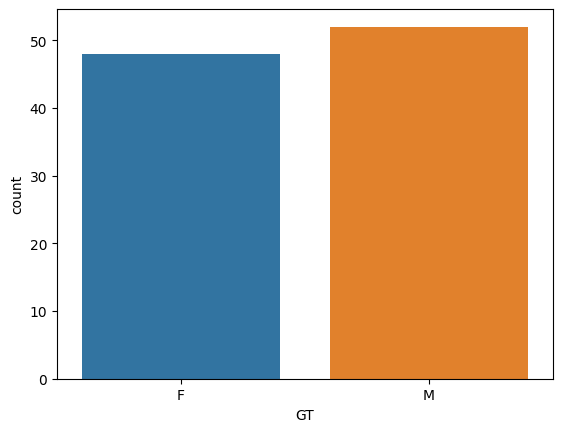

In [15]:
# Hãy trực quan số lượng sinh viên theo giới tính
sns.countplot(x='GT', data=df)
plt.show()

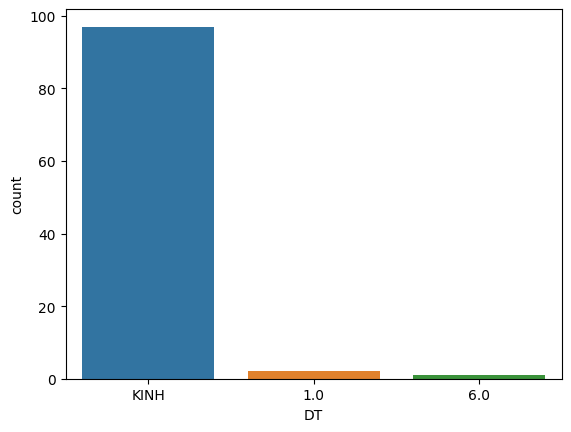

In [16]:
# Biểu diễn DT
sns.countplot(x='DT', data=df)
plt.show()

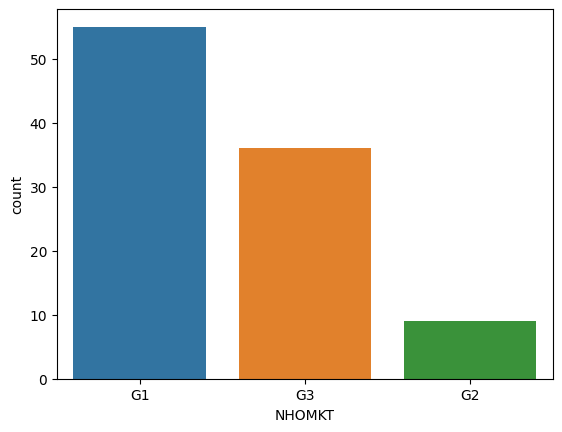

In [17]:
# Biểu diễn NHOMKT
sns.countplot(x='NHOMKT', data=df)
plt.show()

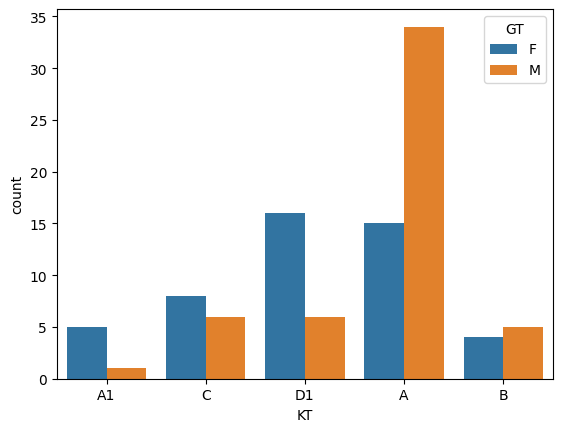

In [18]:
# hãy so sánh số lượng học sinh đăng ký theo khối thi dựa theo giới tính
sns.countplot(x='KT', hue='GT', data=df)
plt.show()

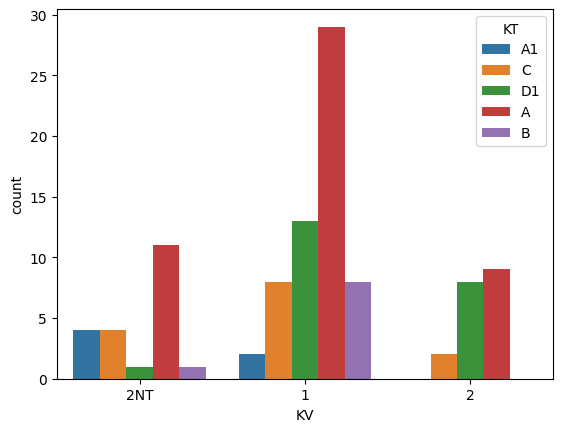

In [19]:
# Hãy cho biết khối A có sinh vien khu vực nào đăng ký cao nhất
sns.countplot(x='KV', hue='KT', data=df)
plt.show()

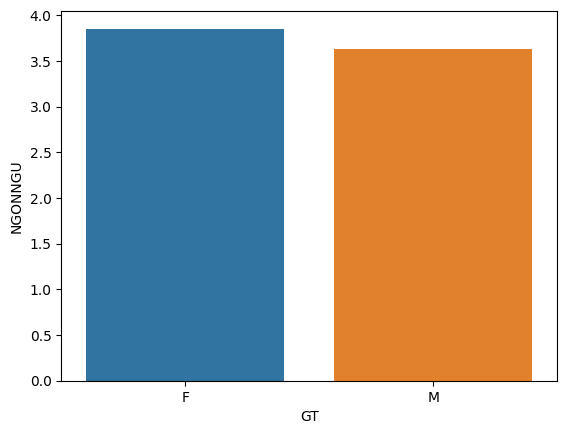

In [20]:
# Hãy so sánh trung bình điểm NGONNGU theo giới tính
sns.barplot(x='GT', y='NGONNGU', data=df, errorbar=None)
plt.show()

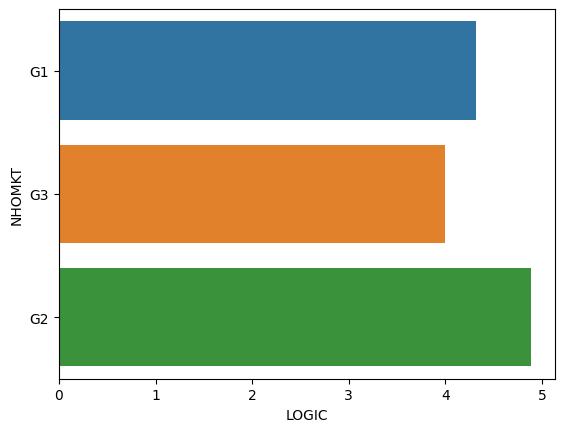

In [22]:
# Hãy so sánh trung bình điểm logic theo giới tính
sns.barplot(x='LOGIC', y='NHOMKT', data=df, errorbar=None)
plt.show()

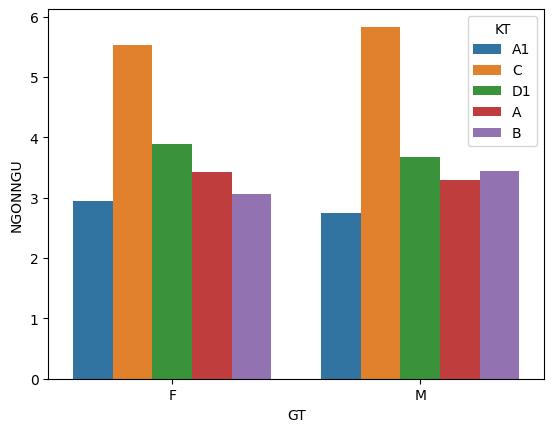

In [ ]:
sns.barplot(x='GT', y='NGONNGU', hue='KT', data=df, errorbar=None)
plt.show()

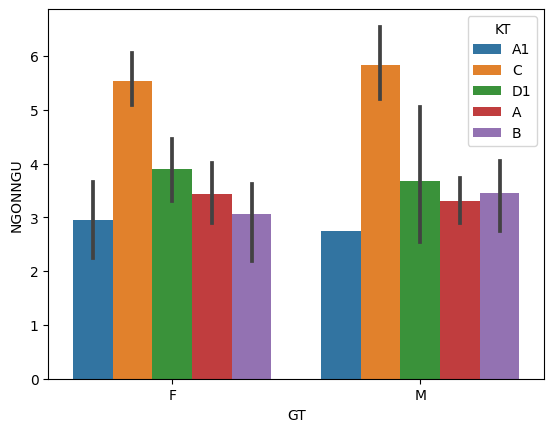

In [ ]:
# So sánh sai số trên NGONNGU theo nhóm GT theo KT
sns.barplot(x='GT', y='NGONNGU', hue='KT', data=df)
plt.show()

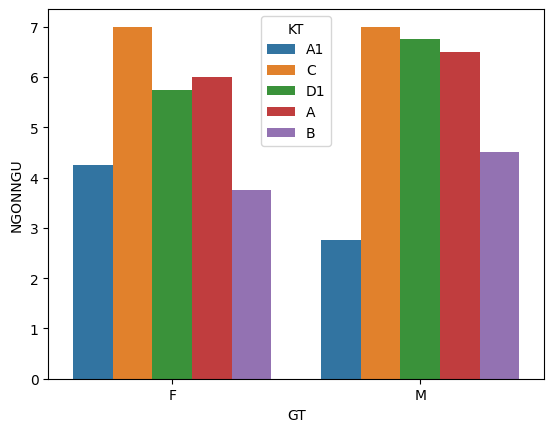

In [ ]:
# So sánh điểm cao nhất của NGONNGU theo nhóm GT theo KT
# Lưu ý: không để estimator thì mặc định là mean
sns.barplot(x='GT', y='NGONNGU', hue='KT', data=df, errorbar=None, estimator=max)
plt.show()

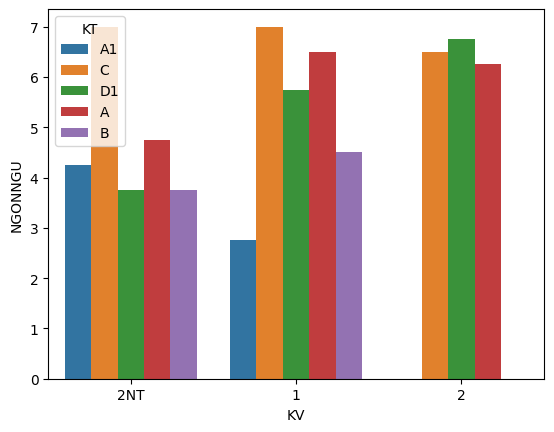

In [ ]:
import numpy as np
# Khi biến định tính dùng là nhóm tổng hợp
# có nhiều hơn 2 giá trị hoặc có giá trị tối thiểu của điểm NGONNGU trên từng nhóm
# khi ta cần dùng hàm tổng hợp thông qua thư viện numpy
sns.barplot(x='KV', y='NGONNGU', hue='KT', data=df, errorbar=None, estimator=np.max)
plt.show()

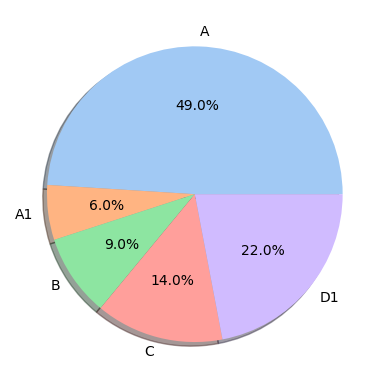

In [ ]:
# Biểu đồ PIE
# Mục định: để trực quan hóa dữ liệu trên nhóm KT theo tỉ lệ phần trăm
gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index #label = ['A', 'A1', 'B', 'C', 'D1']
data = list(gb['count'])
colors = sns.color_palette('pastel') # tao bang mau
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

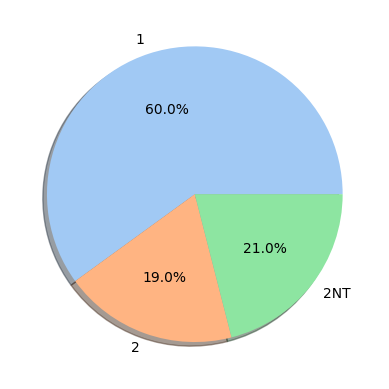

In [ ]:
gb = df.groupby(['KV'])['KV'].agg(['count'])
''''''
labels = gb.index #label = ['A', 'A1', 'B', 'C', 'D1']
data = list(gb['count'])
colors = sns.color_palette('pastel') # tao bang mau
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

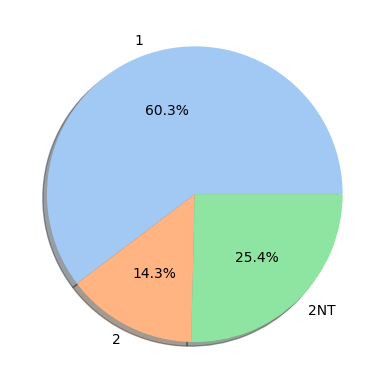

In [ ]:
# Trực quan tỉ lệ phần trăm tổng điểm DIEMCONG trên từng nhóm KV
gb = df.groupby(['KV'])['DIEMCONG'].agg(['sum'])

labels = gb.index #label = ['A', 'A1', 'B', 'C', 'D1']
data = list(gb['sum'])
colors = sns.color_palette('pastel') # tao bang mau
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

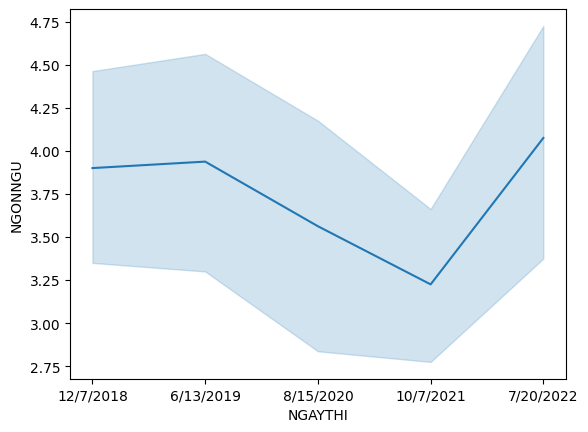

In [ ]:
# Biểu đồ line thường dùng để tổng hợp dữ liệu theo trục Thời gian hoặc có thứ tự
# ví dụ: Tổng hợp trung bình điểm NGONNGU theo các kì thi
sns.lineplot(x='NGAYTHI', y='NGONNGU', data=df)
plt.show()

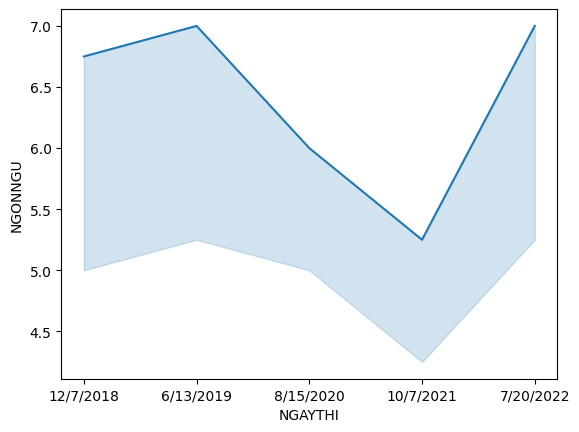

In [ ]:
# Tổng quan điểm NGONNGU lớn nhất theo các năm bằng biểu đồ line
sns.lineplot(x='NGAYTHI', y='NGONNGU', data=df, estimator=np.max)
plt.show()

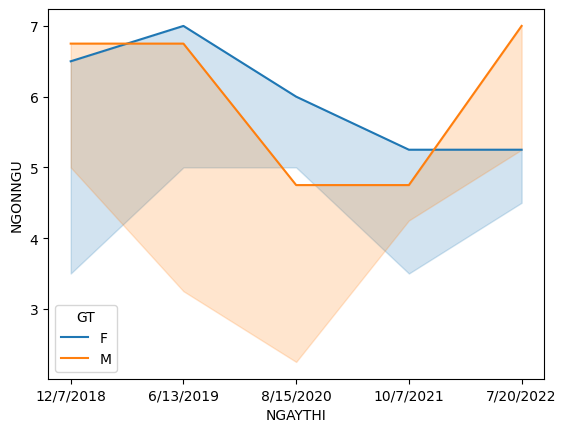

In [ ]:
# Tổng quan điểm NGONNGU lớn nhất theo các năm thi trên từng nhóm giới tính bằng biểu đồ line
sns.lineplot(x='NGAYTHI', y='NGONNGU', hue='GT', data=df, estimator=np.max)
plt.show()